In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy.spatial import cKDTree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
%matplotlib inline

In [4]:
#load data
data = pd.read_csv(r'data/Training_wells.csv')

In [6]:
from pykrige import UniversalKriging
from scipy.interpolate import Rbf
empty = pd.read_csv('data/Empty_part.csv')

OK = UniversalKriging(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3],nlags= 8, variogram_model= 'hole-effect', weight= True,
                         verbose=False, enable_plotting=False)
z, ss = OK.execute('points', empty.X.astype(float), empty.Y.astype(float))

rbf = Rbf(data.iloc[:,1], data.iloc[:,2], data.iloc[:,3],  epsilon=0.01, smooth = 0)
y_pred = rbf(empty.iloc[:,1], empty.iloc[:,2])

# y_pred2 = griddata(data.iloc[:,1:3], data.iloc[:,3], empty.iloc[:,1:3], method='linear')
# y_pred2[np.isnan(y_pred2)] = y_pred[np.isnan(y_pred2)]
    
empty['NTG'] = (z + y_pred )/2
# empty = empty.append(data)


In [8]:
# empty
empty.to_csv('submission.csv', index = None)

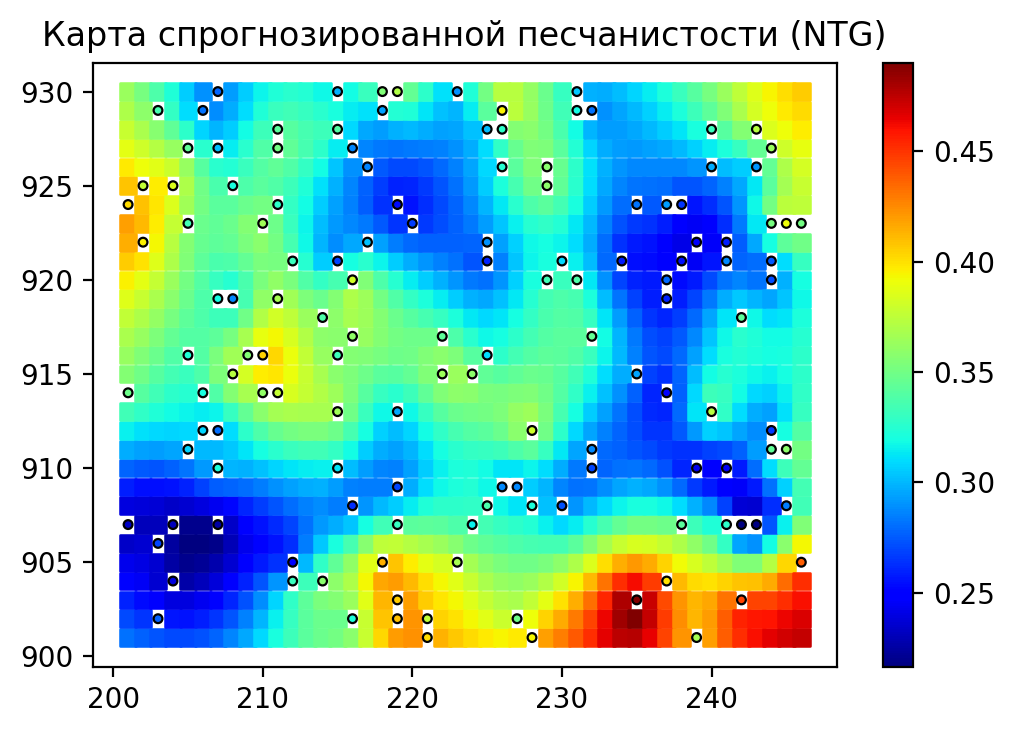

In [9]:
plt.figure(dpi = 200)
plt.title('Карта спрогнозированной песчанистости (NTG)')
plt.scatter(empty.X, empty.Y, cmap = 'jet', c = empty.NTG, marker='s', lw = 0.92)
plt.colorbar()
plt.scatter(data.X, data.Y, cmap = 'jet', c = data.NTG, marker='o', lw = 0.8, edgecolors='black', s = 10)
plt.show()